# House Price Prediction : Regression Model

## Goal of the project:

To predict the price of a house by its features. If we want to buy or sell a house, it is better to know the exact
price of the house, so we use supervised machine learning regression algorithm to pridict the price of the house 
based on the features provided.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv("property_price_train.csv")
df_test = pd.read_csv("property_price_test.csv")
df_train.head(10)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RLD,85.0,14115,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RLD,75.0,10084,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RLD,NaN,10382,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RMD,51.0,6120,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RLD,50.0,7420,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df_test.head(10)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RLD,75.0,10194.721200,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RLD,NaN,15033.338140,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RLD,63.0,12975.123110,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RLD,85.0,22272.588650,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RLD,70.0,11464.167120,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
print("Shape of train dataset: ", df_train.shape)
print("Shape of test dataset: ", df_test.shape)

Shape of train dataset:  (1459, 81)
Shape of test dataset:  (1459, 80)


In [5]:
df_train.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [6]:
# To show the all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [7]:
df_train.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
cat_features_train = df_train.select_dtypes(include = ["object"]).columns
print("total number of categorical features in train dataset:", len(cat_features_train))

cat_features_test = df_test.select_dtypes(include = ["object"]).columns
print("total number of categorical features in test dataset:", len(cat_features_test))

total number of categorical features in train dataset: 43
total number of categorical features in test dataset: 43


In [9]:
num_features_train = df_train.select_dtypes(include = ["int64","float64"]).columns
print("total number of categorical features in train dataset:", len(num_features_train))

num_features_test = df_test.select_dtypes(include = ["int64","float64"]).columns
print("total number of categorical features in test dataset:", len(num_features_test))

total number of categorical features in train dataset: 38
total number of categorical features in test dataset: 37


In [10]:
cat_features_train == cat_features_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [11]:
for i in cat_features_train:
    if len(df_train[i].unique()) != len(df_test[i].unique()):
        print(i)

Zoning_Class
Condition1
Condition2
House_Design
Roof_Quality
Exterior1st
Heating_Type
Electrical_System
Kitchen_Quality
Functional_Rate
Garage_Quality
Pool_Quality
Miscellaneous_Feature
Sale_Type
Sale_Condition


In [12]:
## concat train and test
df = pd.concat((df_train, df_test))
print("Shape of df: ", df.shape)

Shape of df:  (2918, 81)


In [13]:
df.describe()

,Bedroom_Above_Grade,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Building_Class,Construction_Year,Enclosed_Lobby_Area,Fireplaces,First_Floor_Area,Full_Bathroom_Above_Grade,Garage_Area,Garage_Built_Year,Garage_Size,Grade_Living_Area,Half_Bathroom_Above_Grade,House_Condition,Id,Kitchen_Above_Grade,Lot_Extent,Lot_Size,LowQualFinSF,Miscellaneous_Value,Month_Sold,Open_Lobby_Area,Overall_Material,Pool_Area,Remodel_Year,Rooms_Above_Grade,Sale_Price,Screen_Lobby_Area,Second_Floor_Area,Three_Season_Lobby_Area,Total_Basement_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,W_Deck_Area,Year_Sold
count,2918.000000,2895.000000,2917.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2759.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,1459.000000,2918.000000,2918.000000,2918.000000,2917.000000,2916.000000,2916.000000,2918.000000,2918.000000
mean,2.860178,102.236615,441.290024,49.499829,560.917724,57.150446,1971.314942,24.411772,0.597327,1159.548663,1.568197,471.851510,1978.118159,1.766884,1500.843729,0.380055,5.564428,1460.000000,1.044551,69.303454,10194.634957,4.696025,50.843386,6.213160,48.062908,6.089445,2.252570,1984.271076,6.451679,180944.102810,16.067855,336.599040,2.603153,1051.707576,0.429698,0.061385,93.095222,2007.792666
std,0.822830,179.355169,455.632103,169.176028,439.548616,42.519354,30.296408,64.346881,0.646145,392.425265,0.552964,213.846684,25.577701,0.761623,506.117484,0.502827,1.113292,842.931492,0.214497,23.349420,7888.702911,46.404695,567.498680,2.715224,68.167925,1.410045,35.670034,20.894880,1.569626,79464.918335,56.193208,428.729653,25.192440,440.825601,0.524719,0.245726,126.257764,1.315184
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1872.000000,-164.807386,0.000000,334.000000,0.000000,-129.369350,1895.000000,0.000000,334.000000,0.000000,1.000000,1.000000,0.000000,21.000000,-4265.104479,0.000000,0.000000,1.000000,-187.149958,1.000000,0.000000,1950.000000,2.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-338.112031,2006.000000
25%,2.000000,0.000000,0.000000,0.000000,220.000000,20.000000,1953.250000,0.000000,0.000000,876.000000,1.000000,323.000000,1960.000000,1.000000,1126.000000,0.000000,5.000000,730.250000,1.000000,59.000000,7134.500000,0.000000,0.000000,4.000000,0.000000,5.000000,0.000000,1965.000000,5.000000,129950.000000,0.000000,0.000000,0.000000,793.000000,0.000000,0.000000,0.000000,2007.000000
50%,3.000000,0.000000,368.000000,0.000000,467.000000,50.000000,1973.000000,0.000000,1.000000,1082.000000,2.000000,477.000000,1979.000000,2.000000,1444.000000,0.000000,5.000000,1460.000000,1.000000,68.000000,9600.000000,0.000000,0.000000,6.000000,36.000000,6.000000,0.000000,1993.000000,6.000000,163000.000000,0.000000,0.000000,0.000000,989.000000,0.000000,0.000000,75.123594,2008.000000
75%,3.000000,164.000000,733.000000,0.000000,806.000000,70.000000,2001.000000,50.325034,1.000000,1387.750000,2.000000,593.481992,2002.000000,2.000000,1743.750000,1.000000,6.000000,2189.750000,1.000000,80.000000,12342.000000,0.000000,0.000000,8.000000,86.733331,7.000000,0.000000,2004.000000,7.000000,214000.000000,0.000000,704.000000,0.000000,1302.000000,1.000000,0.000000,173.183207,2009.000000
max,8.000000,1600.000000,5644.000000,1526.000000,2336.000000,190.000000,2010.000000,1012.000000,4.000000,5095.000000,4.000000,1488.000000,2207.000000,5.000000,5642.000000,2.000000,9.000000,2919.000000,3.000000,313.000000,215245.000000,1064.000000,17000.000000,12.000000,742.000000,10.000000,800.000000,2010.000000,15.000000,755000.000000,576.000000,2065.000000,508.000000,6110.000000,3.000000,2.000000,1424.000000,2010.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 81 columns):
Air_Conditioning             2918 non-null object
Basement_Condition           2836 non-null object
Basement_Height              2837 non-null object
Bedroom_Above_Grade          2918 non-null int64
Brick_Veneer_Area            2895 non-null float64
Brick_Veneer_Type            2894 non-null object
BsmtFinSF1                   2917 non-null float64
BsmtFinSF2                   2917 non-null float64
BsmtFinType1                 2839 non-null object
BsmtFinType2                 2838 non-null object
BsmtUnfSF                    2917 non-null float64
Building_Class               2918 non-null int64
Condition1                   2918 non-null object
Condition2                   2918 non-null object
Construction_Year            2918 non-null int64
Electrical_System            2917 non-null object
Enclosed_Lobby_Area          2918 non-null float64
Exposure_Level               2836 non-nul

In [15]:
df.isnull().sum()/df.shape[0]*100

Air_Conditioning              0.000000
Basement_Condition            2.810144
Basement_Height               2.775874
Bedroom_Above_Grade           0.000000
Brick_Veneer_Area             0.788211
Brick_Veneer_Type             0.822481
BsmtFinSF1                    0.034270
BsmtFinSF2                    0.034270
BsmtFinType1                  2.707334
BsmtFinType2                  2.741604
BsmtUnfSF                     0.034270
Building_Class                0.000000
Condition1                    0.000000
Condition2                    0.000000
Construction_Year             0.000000
Electrical_System             0.034270
Enclosed_Lobby_Area           0.000000
Exposure_Level                2.810144
Exterior1st                   0.034270
Exterior2nd                   0.034270
Exterior_Condition            0.000000
Exterior_Material             0.000000
Fence_Quality                80.431803
Fireplace_Quality            48.629198
Fireplaces                    0.000000
First_Floor_Area         

In [16]:
df.drop(columns=["Fence_Quality","Fireplace_Quality","Lane_Type","Miscellaneous_Feature","Pool_Quality","Id","Sale_Price"],inplace = True)

In [17]:
df.shape

(2918, 74)

In [18]:
null_value_column = df.columns[df.isnull().any()]

In [19]:
df[null_value_column].dtypes


Basement_Condition            object
Basement_Height               object
Brick_Veneer_Area            float64
Brick_Veneer_Type             object
BsmtFinSF1                   float64
BsmtFinSF2                   float64
BsmtFinType1                  object
BsmtFinType2                  object
BsmtUnfSF                    float64
Electrical_System             object
Exposure_Level                object
Exterior1st                   object
Exterior2nd                   object
Functional_Rate               object
Garage                        object
Garage_Area                  float64
Garage_Built_Year            float64
Garage_Condition              object
Garage_Finish_Year            object
Garage_Quality                object
Garage_Size                  float64
Kitchen_Quality               object
Lot_Extent                   float64
Sale_Type                     object
Total_Basement_Area          float64
Underground_Full_Bathroom    float64
Underground_Half_Bathroom    float64
U

In [20]:
for j in null_value_column:
    if df[j].dtypes == "object":
        print("non null values in",j,"is",df[j].value_counts().sum())

non null values in Basement_Condition is 2836
non null values in Basement_Height is 2837
non null values in Brick_Veneer_Type is 2894
non null values in BsmtFinType1 is 2839
non null values in BsmtFinType2 is 2838
non null values in Electrical_System is 2917
non null values in Exposure_Level is 2836
non null values in Exterior1st is 2917
non null values in Exterior2nd is 2917
non null values in Functional_Rate is 2916
non null values in Garage is 2761
non null values in Garage_Condition is 2759
non null values in Garage_Finish_Year is 2759
non null values in Garage_Quality is 2759
non null values in Kitchen_Quality is 2917
non null values in Sale_Type is 2917
non null values in Utility_Type is 2916
non null values in Zoning_Class is 2914


In [21]:
# K nearest neighbour and naive biased are used in case of missing data, it doesnt affected by missing values.
# but do not use sklearn with it if data is unclean

In [22]:
for k in null_value_column:
    if df[k].dtypes == "object":
        df[k].fillna(df[k].mode()[0], inplace = True)

In [23]:
for l in null_value_column:
    if df[l].dtypes == "object":
        print("non null values in",l,"is",df[j].value_counts().sum())

non null values in Basement_Condition is 2918
non null values in Basement_Height is 2918
non null values in Brick_Veneer_Type is 2918
non null values in BsmtFinType1 is 2918
non null values in BsmtFinType2 is 2918
non null values in Electrical_System is 2918
non null values in Exposure_Level is 2918
non null values in Exterior1st is 2918
non null values in Exterior2nd is 2918
non null values in Functional_Rate is 2918
non null values in Garage is 2918
non null values in Garage_Condition is 2918
non null values in Garage_Finish_Year is 2918
non null values in Garage_Quality is 2918
non null values in Kitchen_Quality is 2918
non null values in Sale_Type is 2918
non null values in Utility_Type is 2918
non null values in Zoning_Class is 2918


In [24]:
for m in null_value_column:
    if df[m].dtypes != "object":
        print("non null values in",m,"is",df[m].value_counts().sum())

non null values in Brick_Veneer_Area is 2895
non null values in BsmtFinSF1 is 2917
non null values in BsmtFinSF2 is 2917
non null values in BsmtUnfSF is 2917
non null values in Garage_Area is 2917
non null values in Garage_Built_Year is 2759
non null values in Garage_Size is 2917
non null values in Lot_Extent is 2432
non null values in Total_Basement_Area is 2917
non null values in Underground_Full_Bathroom is 2916
non null values in Underground_Half_Bathroom is 2916


In [25]:
for n in null_value_column:
    if df[n].dtypes != "object":
        df[n].fillna(df[n].mean(), inplace = True)

In [26]:
for o in null_value_column:
    if df[o].dtypes != "object":
        print("non null values in",o,"is",df[o].value_counts().sum())

non null values in Brick_Veneer_Area is 2918
non null values in BsmtFinSF1 is 2918
non null values in BsmtFinSF2 is 2918
non null values in BsmtUnfSF is 2918
non null values in Garage_Area is 2918
non null values in Garage_Built_Year is 2918
non null values in Garage_Size is 2918
non null values in Lot_Extent is 2918
non null values in Total_Basement_Area is 2918
non null values in Underground_Full_Bathroom is 2918
non null values in Underground_Half_Bathroom is 2918


In [27]:
df.isnull().sum()

Air_Conditioning             0
Basement_Condition           0
Basement_Height              0
Bedroom_Above_Grade          0
Brick_Veneer_Area            0
Brick_Veneer_Type            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtFinType1                 0
BsmtFinType2                 0
BsmtUnfSF                    0
Building_Class               0
Condition1                   0
Condition2                   0
Construction_Year            0
Electrical_System            0
Enclosed_Lobby_Area          0
Exposure_Level               0
Exterior1st                  0
Exterior2nd                  0
Exterior_Condition           0
Exterior_Material            0
Fireplaces                   0
First_Floor_Area             0
Foundation_Type              0
Full_Bathroom_Above_Grade    0
Functional_Rate              0
Garage                       0
Garage_Area                  0
Garage_Built_Year            0
Garage_Condition             0
Garage_Finish_Year           0
Garage_Q

In [28]:
df.shape

(2918, 74)

In [29]:
#describing target 
df_train["Sale_Price"].describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

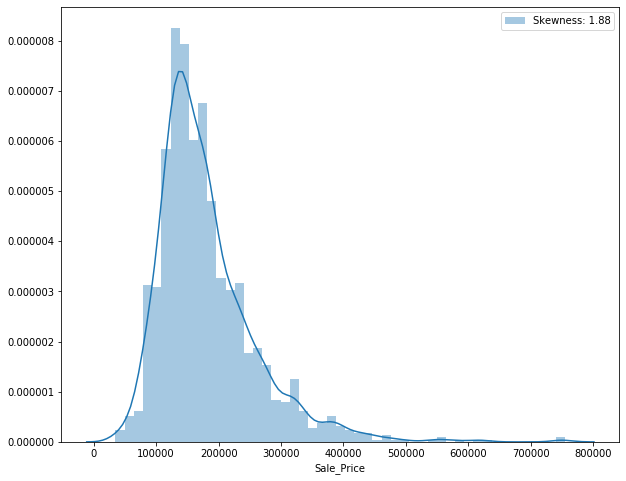

In [30]:
plt.figure(figsize=(10,8))
bar = sns.distplot(df_train["Sale_Price"])
bar.legend(["Skewness: {:.2f}".format(df_train['Sale_Price'].skew())])

(38.0, 0.0)

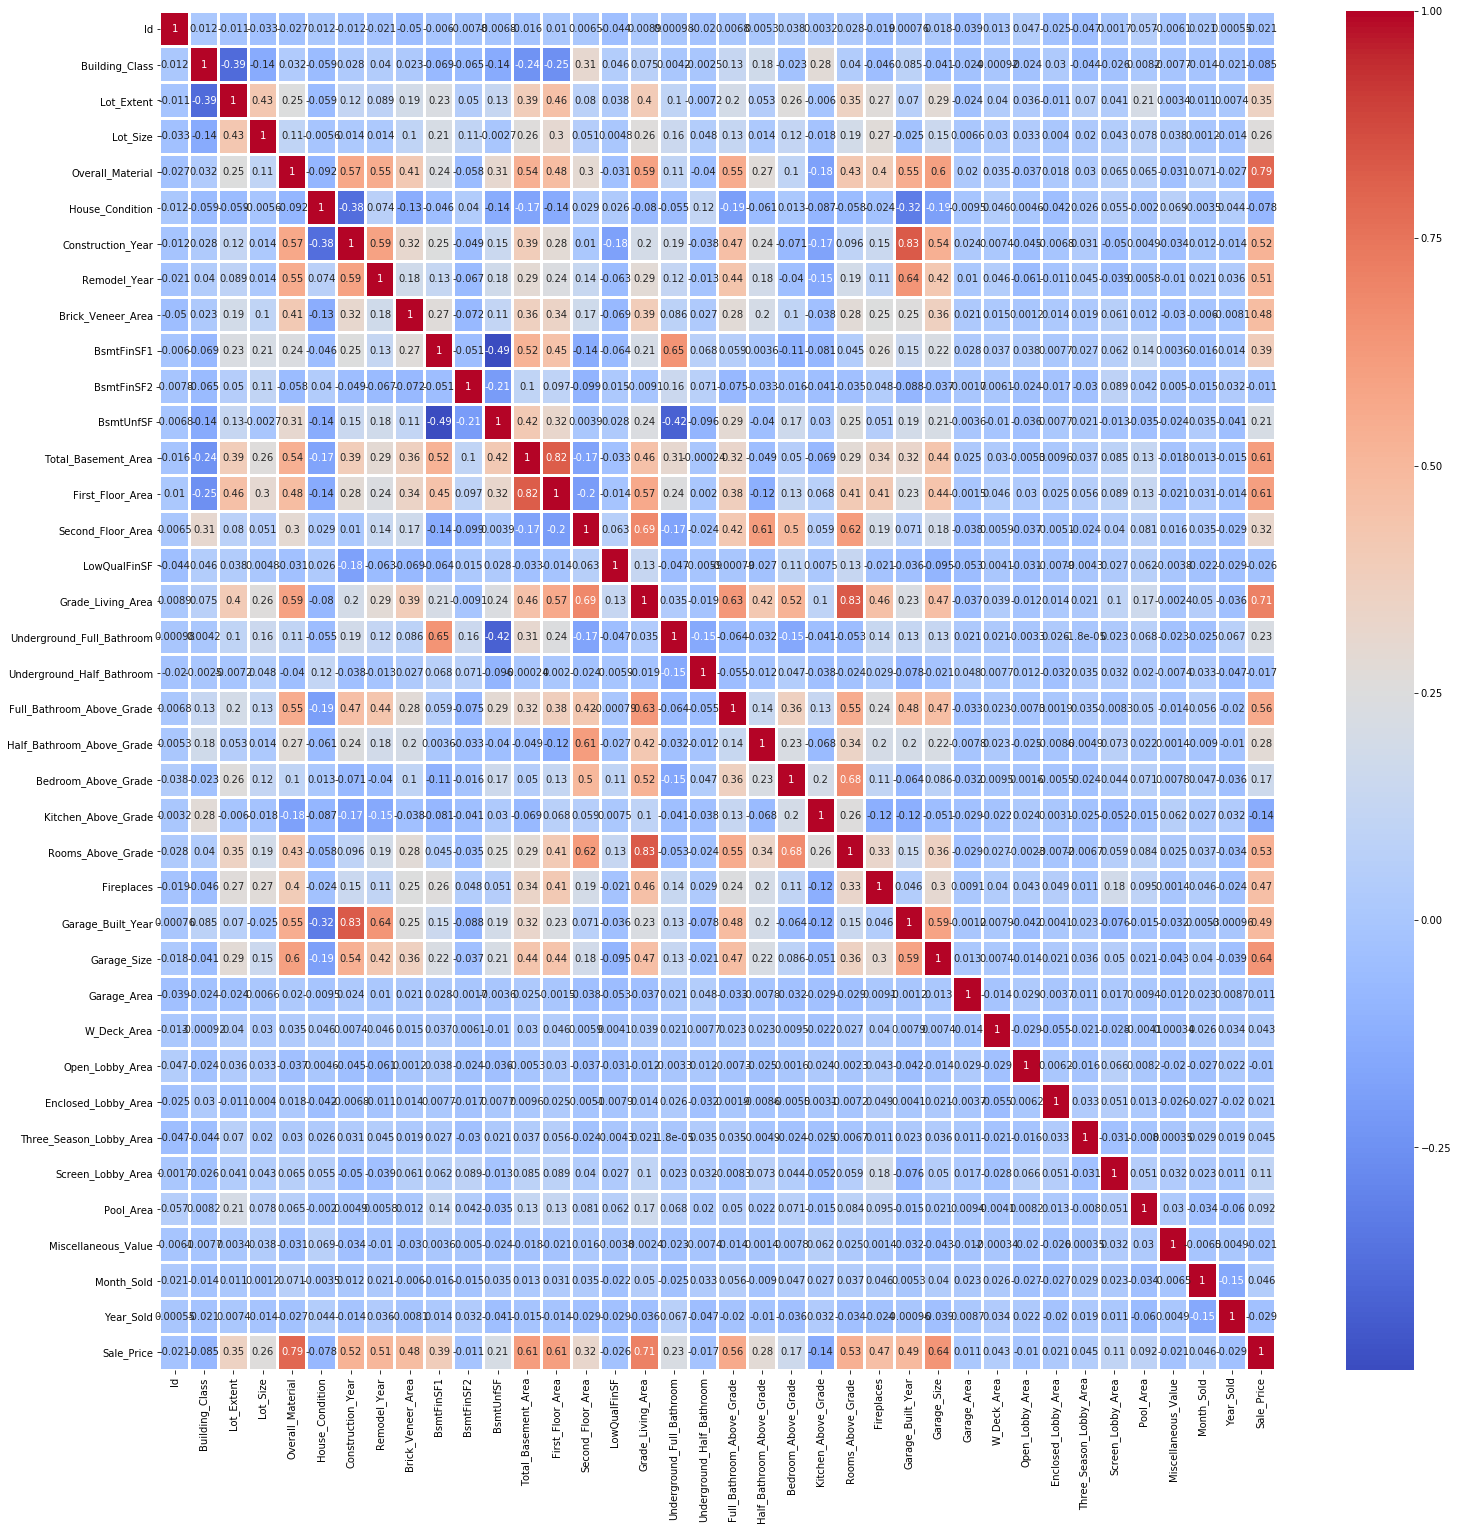

In [31]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(), cmap = "coolwarm", annot=True, linewidth=2)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [32]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = df_train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Sale_Price"]) >= 0.5]
hig_corr_features

Index(['Overall_Material', 'Construction_Year', 'Remodel_Year',
       'Total_Basement_Area', 'First_Floor_Area', 'Grade_Living_Area',
       'Full_Bathroom_Above_Grade', 'Rooms_Above_Grade', 'Garage_Size',
       'Sale_Price'],
      dtype='object')

In [61]:
low_corr_features = hig_corr.index[abs(hig_corr["Sale_Price"]) < 0.5]
low_corr_features

Index(['Id', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'House_Condition',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Second_Floor_Area', 'LowQualFinSF', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area', 'Screen_Lobby_Area',
       'Pool_Area', 'Miscellaneous_Value', 'Month_Sold', 'Year_Sold'],
      dtype='object')

(10.0, 0.0)

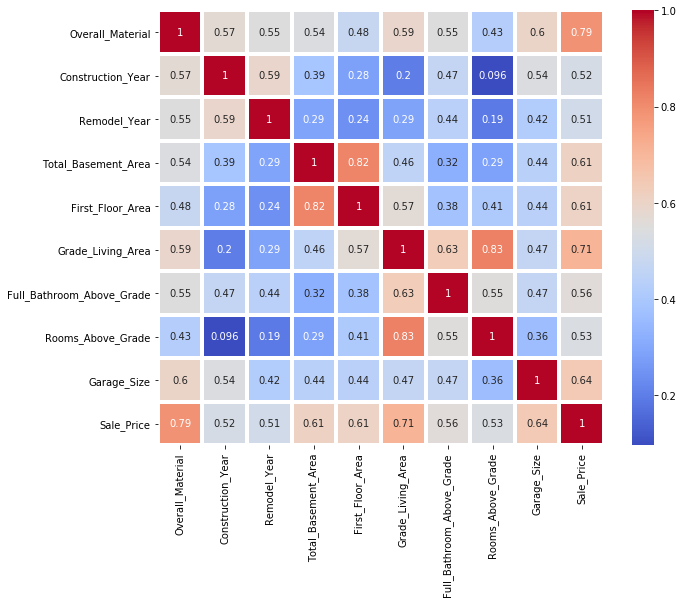

In [33]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

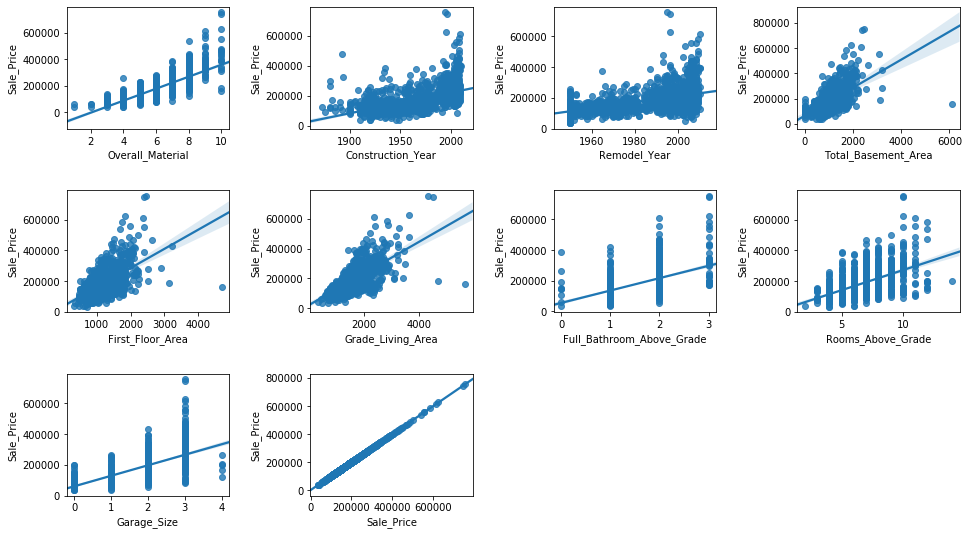

In [34]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=df_train, x = hig_corr_features[i], y = 'Sale_Price')

In [35]:
SalePrice = np.log(df_train['Sale_Price'] + 1)
SalePrice.describe()

count    1459.000000
mean       12.024141
std         0.399573
min        10.460271
25%        11.774913
50%        12.001512
75%        12.273736
max        13.534474
Name: Sale_Price, dtype: float64

## Feature Transformation

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 74 columns):
Air_Conditioning             2918 non-null object
Basement_Condition           2918 non-null object
Basement_Height              2918 non-null object
Bedroom_Above_Grade          2918 non-null int64
Brick_Veneer_Area            2918 non-null float64
Brick_Veneer_Type            2918 non-null object
BsmtFinSF1                   2918 non-null float64
BsmtFinSF2                   2918 non-null float64
BsmtFinType1                 2918 non-null object
BsmtFinType2                 2918 non-null object
BsmtUnfSF                    2918 non-null float64
Building_Class               2918 non-null int64
Condition1                   2918 non-null object
Condition2                   2918 non-null object
Construction_Year            2918 non-null int64
Electrical_System            2918 non-null object
Enclosed_Lobby_Area          2918 non-null float64
Exposure_Level               2918 non-nul

In [37]:
# converting columns in str which have categorical nature but in int64
feat_dtype_convert = ['Building_Class', 'Construction_Year', 'Remodel_Year', 'Garage_Built_Year', 'Year_Sold']
for i in feat_dtype_convert:
    df[i] = df[i].astype(str)

In [38]:
df['Month_Sold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [39]:
# conver in month abbrevation
import calendar
df['Month_Sold'] = df['Month_Sold'].apply(lambda x : calendar.month_abbr[x])

In [40]:
df['Month_Sold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [41]:
num_feat = list(df.loc[:, df.dtypes != 'object'].columns.values)
num_feat

['Bedroom_Above_Grade',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Enclosed_Lobby_Area',
 'Fireplaces',
 'First_Floor_Area',
 'Full_Bathroom_Above_Grade',
 'Garage_Area',
 'Garage_Size',
 'Grade_Living_Area',
 'Half_Bathroom_Above_Grade',
 'House_Condition',
 'Kitchen_Above_Grade',
 'Lot_Extent',
 'Lot_Size',
 'LowQualFinSF',
 'Miscellaneous_Value',
 'Open_Lobby_Area',
 'Overall_Material',
 'Pool_Area',
 'Rooms_Above_Grade',
 'Screen_Lobby_Area',
 'Second_Floor_Area',
 'Three_Season_Lobby_Area',
 'Total_Basement_Area',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'W_Deck_Area']

In [42]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
len(obj_feat)

44

In [43]:
df[obj_feat].head(10)

,Air_Conditioning,Basement_Condition,Basement_Height,Brick_Veneer_Type,BsmtFinType1,BsmtFinType2,Building_Class,Condition1,Condition2,Construction_Year,Electrical_System,Exposure_Level,Exterior1st,Exterior2nd,Exterior_Condition,Exterior_Material,Foundation_Type,Functional_Rate,Garage,Garage_Built_Year,Garage_Condition,Garage_Finish_Year,Garage_Quality,Heating_Quality,Heating_Type,House_Design,House_Type,Kitchen_Quality,Land_Outline,Lot_Configuration,Month_Sold,Neighborhood,Pavedd_Drive,Property_Shape,Property_Slope,Remodel_Year,Road_Type,Roof_Design,Roof_Quality,Sale_Condition,Sale_Type,Utility_Type,Year_Sold,Zoning_Class
0,Y,TA,Gd,BrkFace,GLQ,Unf,60,Norm,Norm,2003,SBrkr,No,VinylSd,VinylSd,TA,Gd,PC,TF,Attchd,2003.0,TA,RFn,TA,Ex,GasA,2Story,1Fam,Gd,Lvl,I,Feb,CollgCr,Y,Reg,GS,2003,Paved,Gable,SS,Normal,WD,AllPub,2008,RLD
1,Y,TA,Gd,None,ALQ,Unf,20,Feedr,Norm,1976,SBrkr,Gd,MetalSd,MetalSd,TA,TA,CB,TF,Attchd,1976.0,TA,RFn,TA,Ex,GasA,1Story,1Fam,TA,Lvl,FR2P,May,Veenker,Y,Reg,GS,1976,Paved,Gable,SS,Normal,WD,AllPub,2007,RLD
2,Y,TA,Gd,BrkFace,GLQ,Unf,60,Norm,Norm,2001,SBrkr,Mn,VinylSd,VinylSd,TA,Gd,PC,TF,Attchd,2001.0,TA,RFn,TA,Ex,GasA,2Story,1Fam,Gd,Lvl,I,Sep,CollgCr,Y,IR1,GS,2002,Paved,Gable,SS,Normal,WD,AllPub,2008,RLD
3,Y,Gd,TA,None,ALQ,Unf,70,Norm,Norm,1915,SBrkr,No,Wd Sdng,Wd Shng,TA,TA,BT,TF,Detchd,1998.0,TA,Unf,TA,Gd,GasA,2Story,1Fam,Gd,Lvl,C,Feb,Crawfor,Y,IR1,GS,1970,Paved,Gable,SS,Abnorml,WD,AllPub,2006,RLD
4,Y,TA,Gd,BrkFace,GLQ,Unf,60,Norm,Norm,2000,SBrkr,Av,VinylSd,VinylSd,TA,Gd,PC,TF,Attchd,2000.0,TA,RFn,TA,Ex,GasA,2Story,1Fam,Gd,Lvl,FR2P,Dec,NoRidge,Y,IR1,GS,2000,Paved,Gable,SS,Normal,WD,AllPub,2008,RLD
5,Y,TA,Gd,None,GLQ,Unf,50,Norm,Norm,1993,SBrkr,No,VinylSd,VinylSd,TA,TA,W,TF,Attchd,1993.0,TA,Unf,TA,Ex,GasA,1.5Fin,1Fam,TA,Lvl,I,Oct,Mitchel,Y,IR1,GS,1995,Paved,Gable,SS,Normal,WD,AllPub,2009,RLD
6,Y,TA,Ex,Stone,GLQ,Unf,20,Norm,Norm,2004,SBrkr,Av,VinylSd,VinylSd,TA,Gd,PC,TF,Attchd,2004.0,TA,RFn,TA,Ex,GasA,1Story,1Fam,Gd,Lvl,I,Aug,Somerst,Y,Reg,GS,2005,Paved,Gable,SS,Normal,WD,AllPub,2007,RLD
7,Y,TA,Gd,Stone,ALQ,BLQ,60,PosN,Norm,1973,SBrkr,Mn,HdBoard,HdBoard,TA,TA,CB,TF,Attchd,1973.0,TA,RFn,TA,Ex,GasA,2Story,1Fam,TA,Lvl,C,Nov,NWAmes,Y,IR1,GS,1973,Paved,Gable,SS,Normal,WD,AllPub,2009,RLD
8,Y,TA,TA,None,Unf,Unf,50,Artery,Norm,1931,FuseF,No,BrkFace,Wd Shng,TA,TA,BT,MD1,Detchd,1931.0,TA,Unf,Fa,Gd,GasA,1.5Fin,1Fam,TA,Lvl,I,Apr,OldTown,Y,Reg,GS,1950,Paved,Gable,SS,Abnorml,WD,AllPub,2008,RMD
9,Y,TA,TA,None,GLQ,Unf,190,Artery,Artery,1939,SBrkr,No,MetalSd,MetalSd,TA,TA,BT,TF,Attchd,1939.0,TA,RFn,Gd,Ex,GasA,1.5Unf,2fmCon,TA,Lvl,C,Jan,BrkSide,Y,Reg,GS,1950,Paved,Gable,SS,Normal,WD,AllPub,2008,RLD


## Converting categorical code into order 

In [44]:
df['Air_Conditioning'] = df.Air_Conditioning.map({'N':0,'Y':1})
df['Basement_Condition'] = df.Basement_Condition.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Basement_Height'] = df.Basement_Height.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['Exposure_Level'] = df.Exposure_Level.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['Exterior_Condition'] = df.Exterior_Condition.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['Exterior_Material'] = df.Exterior_Material.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['Garage_Condition'] = df.Garage_Condition.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Garage_Finish_Year'] = df.Garage_Finish_Year.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['Garage_Quality'] = df.Garage_Quality.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Heating_Quality'] = df.Heating_Quality.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Kitchen_Quality'] = df.Kitchen_Quality.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Pavedd_drive'] = df.Pavedd_Drive.map({'N':0,'P':1,'Y':2})
df['Property_Shape']= df.Property_Shape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Utility_Type'] = df.Utility_Type.map({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3})



In [63]:
df_copy = df
df_copy.shape

(2918, 512)

In [45]:
dummy_col = pd.get_dummies(df_copy[['Basement_Height','Brick_Veneer_Type','Building_Class','Condition1'
                               ,'Condition2','Construction_Year','Electrical_System','Exterior1st','Exterior2nd'
                               ,'Foundation_Type','Functional_Rate','Garage','Garage_Built_Year','Heating_Type',
                               'House_Design','House_Type','Land_Outline','Lot_Configuration','Month_Sold',
                              'Neighborhood','Pavedd_Drive','Property_Slope','Remodel_Year','Road_Type','Roof_Design'
                              ,'Roof_Quality','Sale_Condition','Sale_Type','Year_Sold','Zoning_Class']],
                           drop_first=True)

df_copy = pd.concat([df_copy,dummy_col],axis='columns')
df_copy= df.drop(['Basement_Height','Brick_Veneer_Type','Building_Class','Condition1'
                               ,'Condition2','Construction_Year','Electrical_System','Exterior1st','Exterior2nd'
                               ,'Foundation_Type','Functional_Rate','Garage','Garage_Built_Year','Heating_Type',
                               'House_Design','House_Type','Land_Outline','Lot_Configuration','Month_Sold',
                              'Neighborhood','Pavedd_Drive','Property_Slope','Remodel_Year','Road_Type','Roof_Design'
                              ,'Roof_Quality','Sale_Condition','Sale_Type','Year_Sold','Zoning_Class'],axis='columns')

In [46]:
df_copy.shape

(2918, 512)

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Columns: 512 entries, Air_Conditioning to Zoning_Class_RMD
dtypes: float64(14), int64(31), uint8(467)
memory usage: 2.3 MB


In [48]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df_copy)
df = scaler.transform(df)

## Machine Learning Model Building

In [49]:
train_len = len(df_train)

In [50]:
X_train = df_copy[:train_len]
X_test = df_copy[train_len:]
y_train = df_train['Sale_Price']

print(X_train.shape)
print(X_test.shape)
print(len(y_train))

(1459, 512)
(1459, 512)
1459


In [51]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## Linear Rergression

In [52]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[-3723152505196.7495]

In [53]:
# Cross validation
cross_validation = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of LR model =  [-5.27263705e+08 -9.51962212e+09 -1.57536823e+10 -6.90150380e+08
 -2.19418755e+11 -8.72961527e+11 -6.45755488e+12 -6.02238806e+08
 -3.82724846e+10 -2.85821882e+10]

Cross validation mean accuracy of LR model =  -764388279755.5739


In [54]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.7752175404008977]

In [55]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.4775491585837594]

In [56]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
test_model(svr_reg)

[-0.0511845951944964]

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.6836592031594776]

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8409634735376937]

In [60]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
test_model(xgb_reg)

[10:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bbooster" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bbooster" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bbooster" } might not be used.

  This could be a

[0.8223939264554847]

## Ridge , DecisionTreeRegressor, RandomForestRegressor, xgboost Regressor have good accuracy. But, Random Forest has given the best accuracy of 84%. So, our final model is Random Forest Regressor